# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X= mnist['data']
y= mnist['target']

In [2]:
type(X)

numpy.ndarray

### Now take a look at the shapes of the X and y matricies 

In [3]:
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X[36000]
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

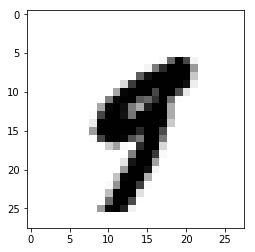

In [5]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.imshow(X[36000].reshape(28,28),cmap = matplotlib.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:

train_range=y[:60000]
test_range=y[60000:]
a=(train_range=="5")
b=(test_range=="5")


X_5_train,X_5_test,y_5_train,y_5_test=X[:60000],X[60000:],a,b


In [9]:
y_train_new=np.where(y_train=="5",True,False)
y_test_new=np.where(y_train=="5",True,False)
y_train_new

array([ True, False, False, ...,  True, False, False])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_5_train)
model= LogisticRegression(max_iter=4000).fit(X_scaled, y_5_train)

### Does the classifier predict correctly the 36000th digit we picked before?

In [12]:

#import sys
#np.set_printoptions(threshold=sys.maxsize)
model.predict(X[36000].reshape(1, -1))

array([False])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [14]:
never_5_clf.fit(X_scaled, y_5_train)
never_predict=never_5_clf.predict(X_5_test)


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [34]:
from sklearn.metrics import confusion_matrix
model_predict=model.predict(X_test)
print(confusion_matrix(y_5_test,never_predict))
print(confusion_matrix(y_5_test,model_predict))
conf5=confusion_matrix(y_5_test,never_predict)
tn, fp, fn, tp = confusion_matrix(y_5_test,never_predict).ravel()
tn
fp

[[9108    0]
 [ 892    0]]
[[9054   54]
 [ 275  617]]


0

In [41]:
#from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_5_test,model_predict)
recall = recall_score(y_5_test,model_predict)
#f1_score = f1_score(y_5_test,model_predict)

precision1 = precision_score(y_5_test,model_predict)
recall1 = recall_score(y_5_test,model_predict)
#f1_score1 = f1_score(y_5_test,model_predict)


precision
recall
f1_score

0.7895073576455535

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
#Since it never

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

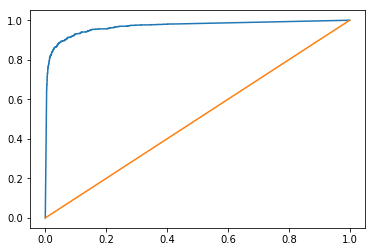

In [56]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_5_test, y_pred_proba)
fpr2, tpr2, threshold2 = roc_curve(y_5_test, never_predict)
plt.plot(fpr,tpr)
plt.plot(fpr2,tpr2)

### Now find the roc_auc_score for each. 

In [60]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_5_test, model_predict))
print(roc_auc_score(y_5_test, never_predict))

0.8428875910597495
0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
#Our model works better than the never 5 predictor